BASIC EXPLATORY DATA ANALYSIS

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [ ]:
fraud_data=pd.read_csv("..\\data\\Fraud_Data.csv")  
credits_card=pd.read_csv("..\\data\\creditcard.csv")
id_address=pd.read_csv("..\\data\\IpAddress_to_Country.csv")

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
credits_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
id_address.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
# Check missing values
print("Missing values in Fraud_Data.csv:\n", fraud_data.isnull().sum())
print("\nMissing values in IpAddress_to_Country.csv:\n", id_address.isnull().sum())
print("\nMissing values in creditcard.csv:\n", credits_card.isnull().sum())


Missing values in Fraud_Data.csv:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values in IpAddress_to_Country.csv:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

Missing values in creditcard.csv:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Droppping duplicates if exist

In [7]:
fraud_data.drop_duplicates(inplace=True)
credits_card.drop_duplicates(inplace=True)
id_address.drop_duplicates(inplace=True)

data_column correct datatype

In [8]:

fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['age'] = fraud_data['age'].astype(int)

In [9]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [11]:
from scripts.EDAs import *

# Univariate and Bivarite Analysis

In [12]:
from scripts.EDAs import univariate_analysis, bivariate_analysis

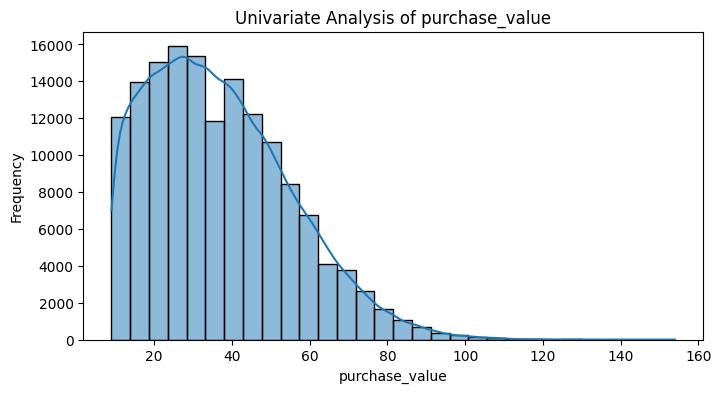

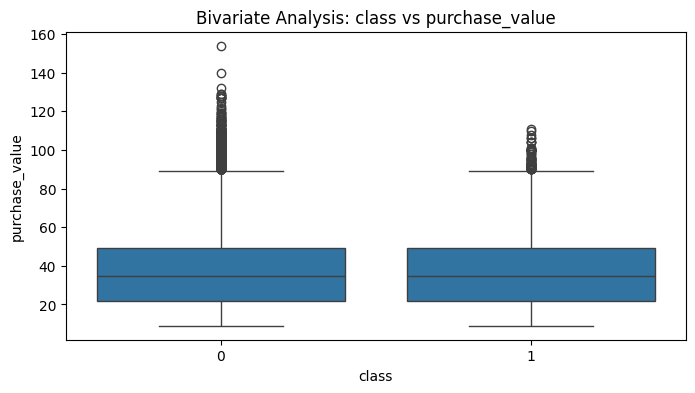

In [17]:
df =fraud_data

# Perform Univariate Analysis
univariate_analysis(df, 'purchase_value')

# Perform Bivariate Analysis
bivariate_analysis(df, 'class', 'purchase_value', plot_type='box')

# Merging of the Datasets

In [18]:
from scripts.geolocation import convert_ip_to_int, merge_with_geolocation

In [20]:

# Convert IP addresses to integer
fraud_data= convert_ip_to_int(fraud_data)

# Merge fraud data with geolocation data
fraud_data = merge_with_geolocation(fraud_data, id_address)


In [22]:
fraud_data.head(10
            )

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328,0,Unknown
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739,0,United States


# Feature_engineering 

In [23]:
from scripts.feature_engineering import calculate_transaction_features, add_time_features

In [24]:
fraud_data= calculate_transaction_features(fraud_data)

In [25]:
fraud_data=add_time_features(fraud_data)

In [26]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,time_since_last_purchase,hour_of_day,day_of_week
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,880217484,0,United States,1,0.0,10,5
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2785906106,0,Switzerland,1,0.0,21,5
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,356056736,0,United States,1,0.0,11,3
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,759104706,0,Unknown,1,0.0,23,2
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2985180352,0,Mexico,1,0.0,20,2


# Normalization and Encoding

In [30]:
from scripts.scaling_encoding import scale_numerical_features

num_cols = ['purchase_value', 'age']
fraud_data = scale_numerical_features(fraud_data, num_cols, method="standard")


encoding categorical datasets

In [32]:
from scripts.encode_cat import encode_categorical_features


In [33]:
cat_cols = ['browser', 'source', 'sex']

fraud_data=encode_categorical_features(fraud_data,cat_cols, method='label')

storing proccessed data

In [34]:
fraud_data.to_csv("..\\data\\cleaned_Fraud_data", index=False)

In [35]:
id_address.to_csv("..\\data\\id_address_ready", index=False)